EDA

In [39]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"D:\dataset\water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [40]:
print(data.shape)

(3276, 10)


In [41]:
print(data.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [42]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [44]:
#Đếm số lượng giá trị duy nhất trong cột
print(data.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [45]:
print(data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [46]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<Axes: >

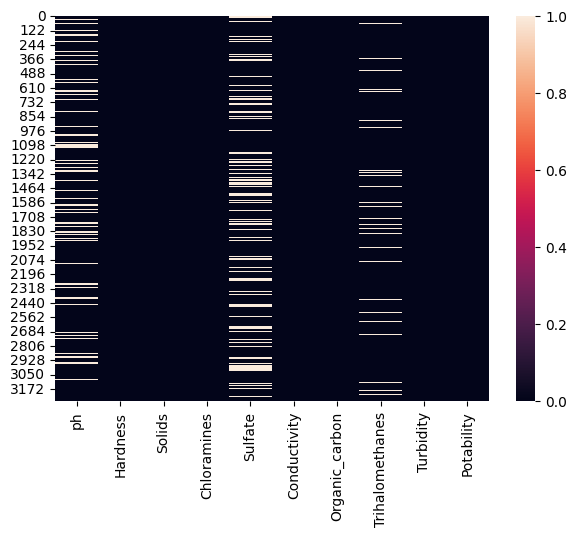

In [47]:
#Biểu đồ heatmap biểu thị giá trị null trong dataset
import seaborn as sns
sns.heatmap(data.isnull())

<Axes: >

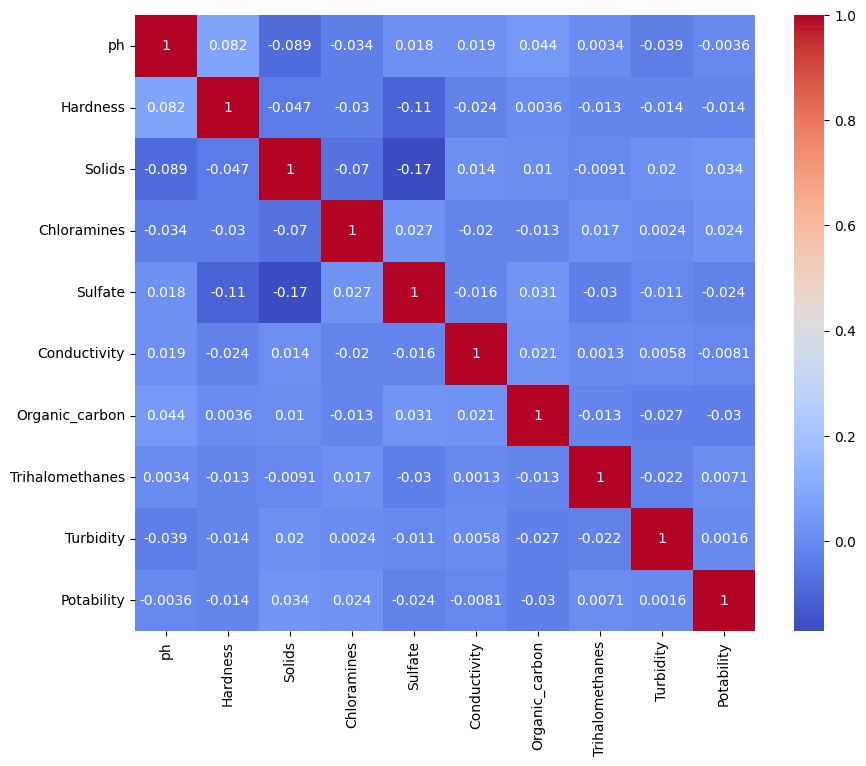

In [48]:
#Biểu đồ tương quan giữa các thuộc tính 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot= True, cmap='coolwarm')

In [49]:
#Tương quan thuộc tính 
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

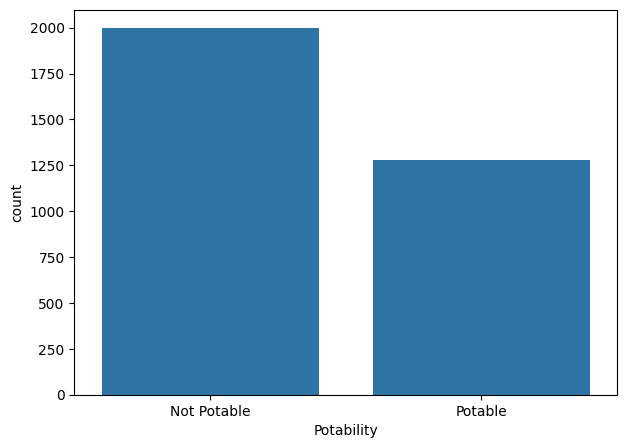

In [50]:
ax = sns.countplot(x = "Potability",data= data, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [51]:
x = data.Potability.value_counts()
labels = [0,1]
print(x)

Potability
0    1998
1    1278
Name: count, dtype: int64


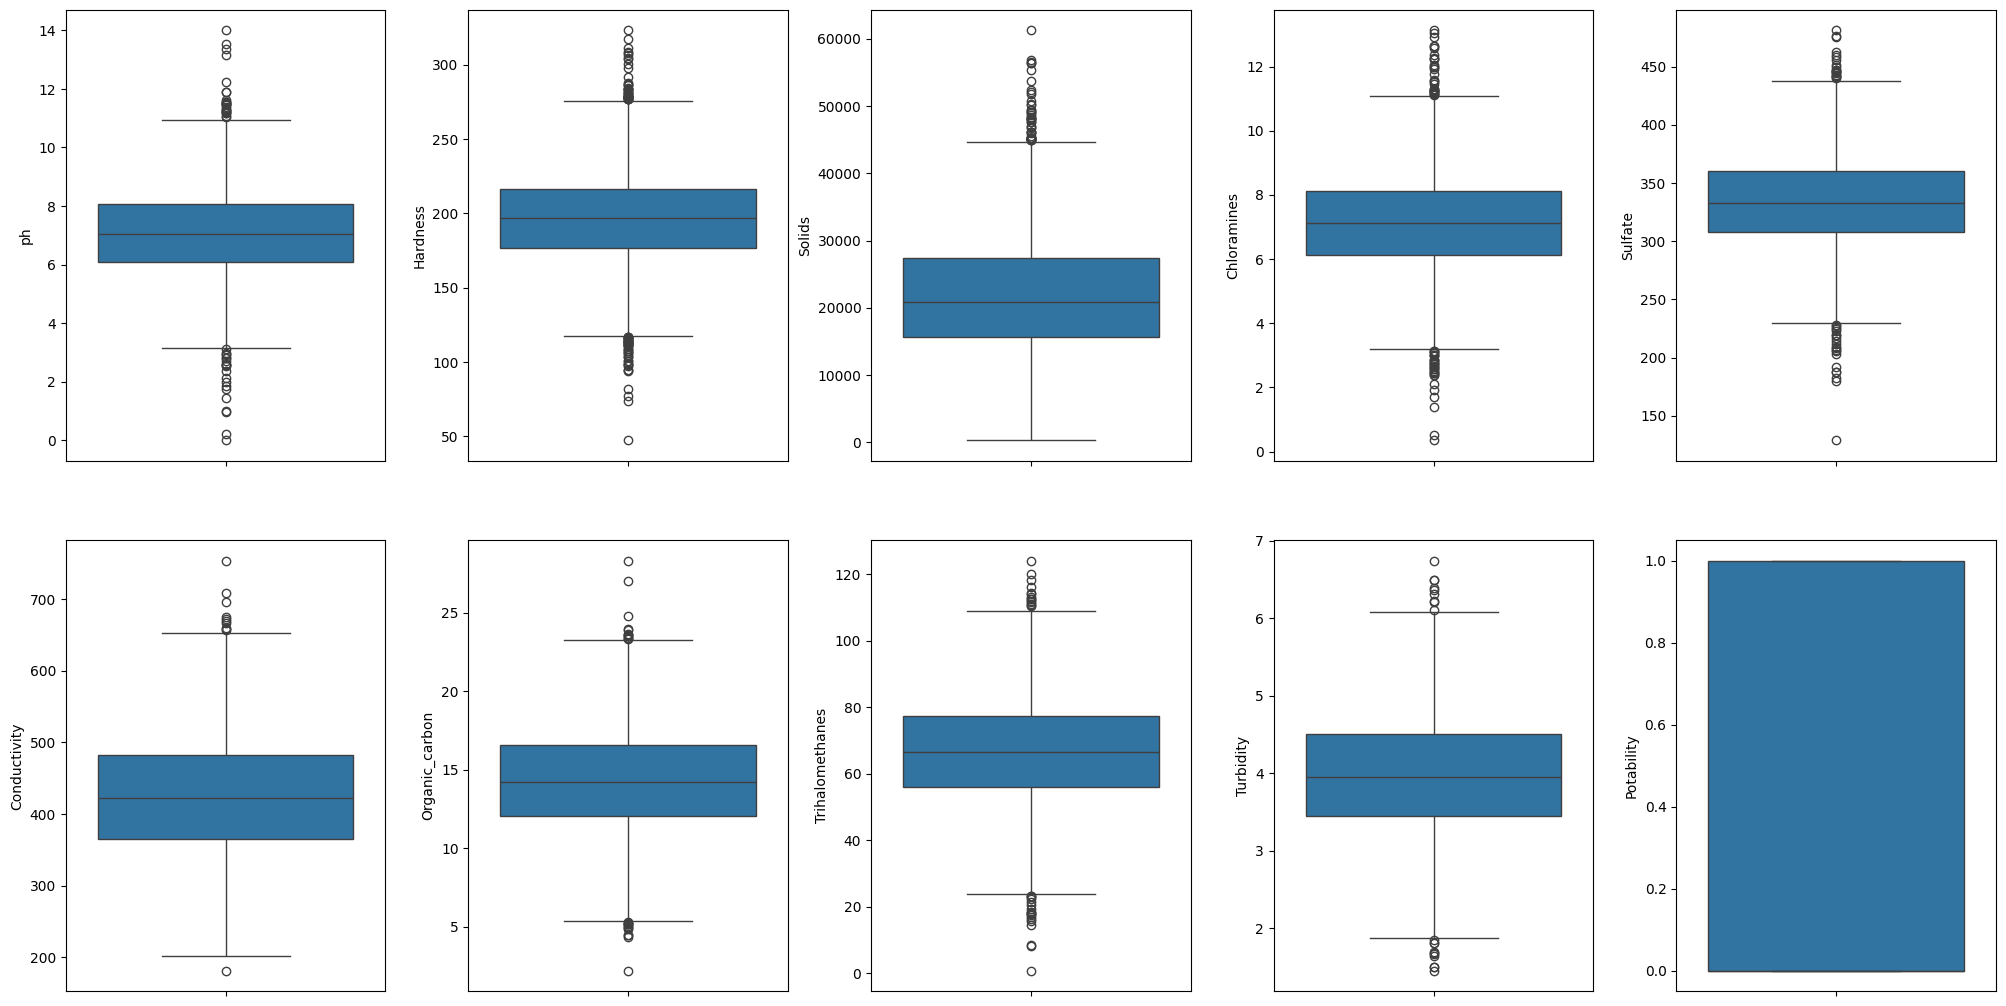

In [52]:
#Kiểm tra các outliers
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

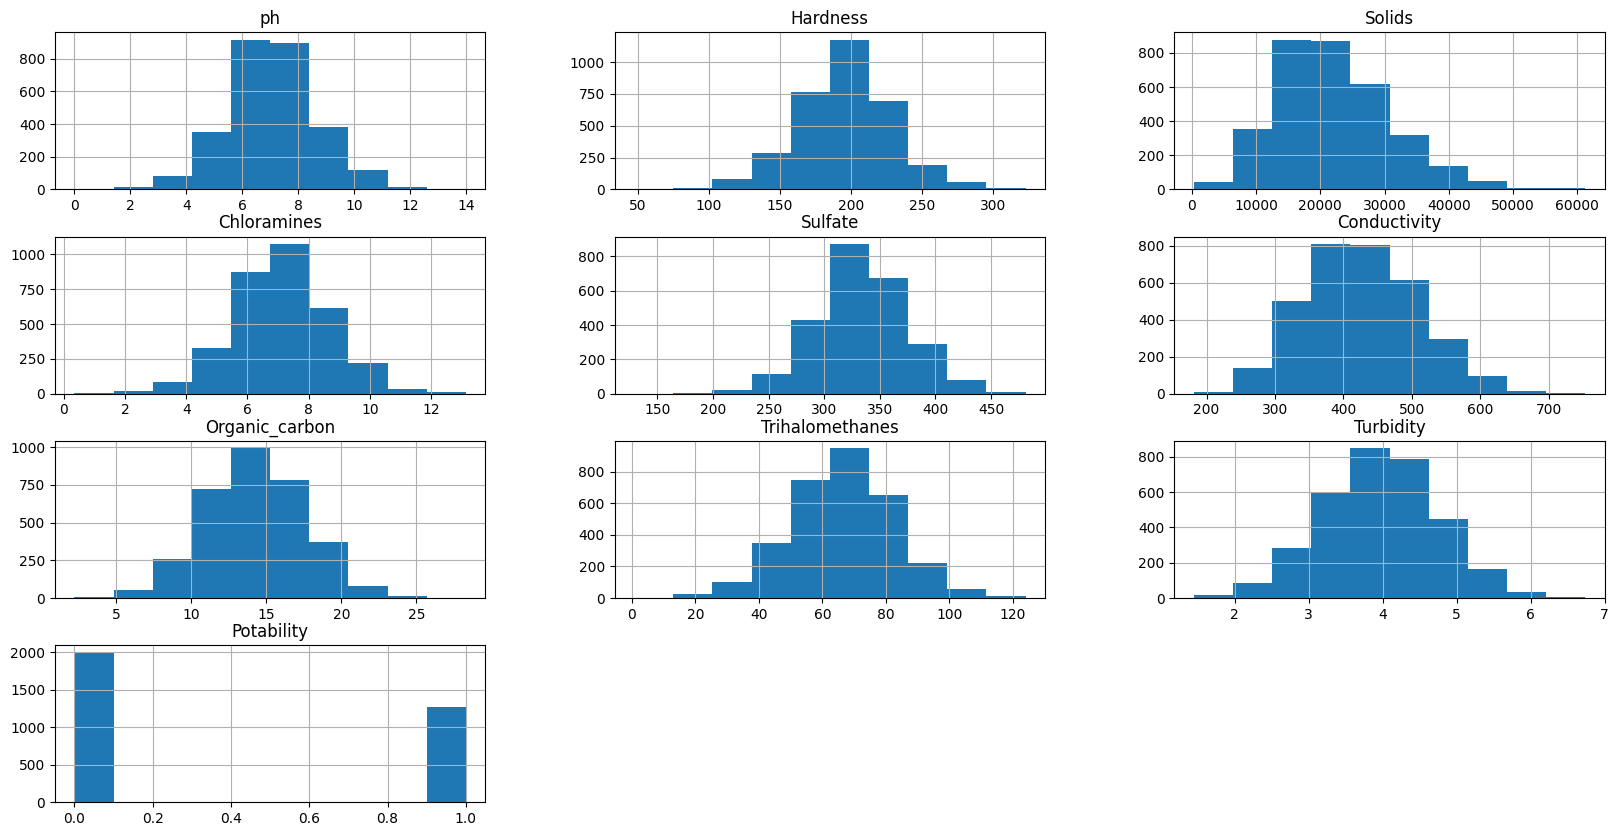

In [53]:
#Visualization
plt.rcParams['figure.figsize'] = [20,10]
data.hist()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\755073907.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Potability', ylabel='Density'>

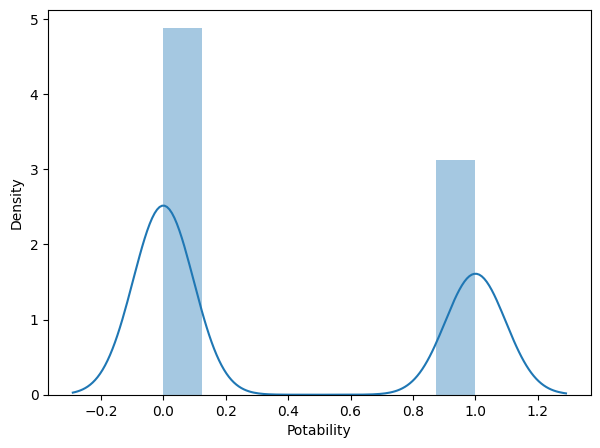

In [54]:
#Biểu đồ hiển thị các cột tần suất(histogram) và đường KDE minh hoa phân bố giá trị
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(data['Potability'])

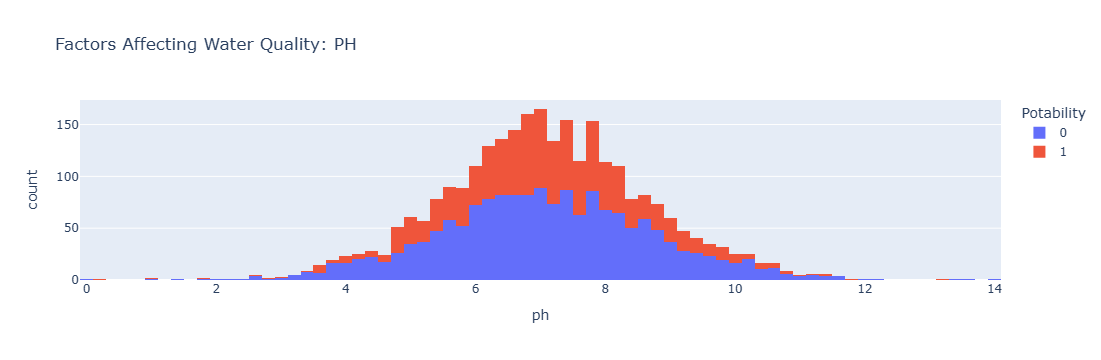

In [55]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

Cột PH biểu thị giá trị PH của nước, đây là yếu tố quan trọng trong việc đánh giá sự cân bằng axit-bazơ của nước. Giá trị PH của nước uống phải nằm trong khoảng từ 6,5 đến 8,5.

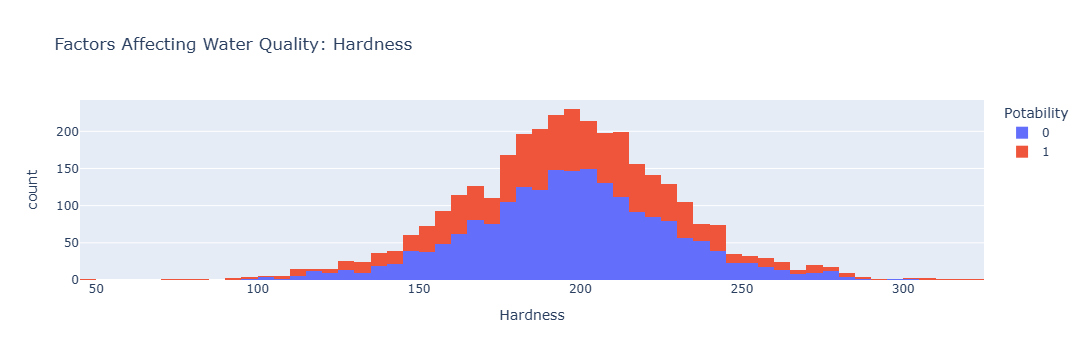

In [57]:
figure = px.histogram(data, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

Độ cứng của nước thường phụ thuộc vào nguồn nước, nhưng nước có độ cứng từ 120-200 miligams là có thể uống được.

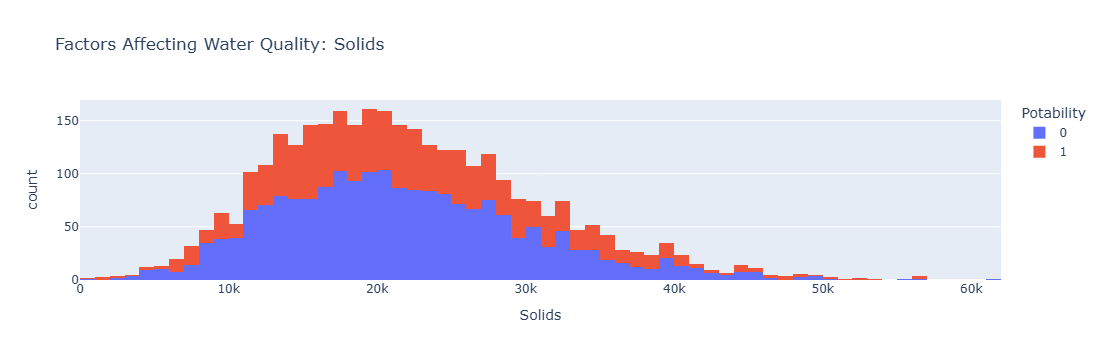

In [59]:
figure = px.histogram(data, x = "Solids", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

Tất cả các khoáng chất hữu cơ và vô cơ có trong nước được gọi là chất rắn hòa tan. Nước có số lượng chất rắn hòa tan rất cao là nước có độ khoáng hóa cao.

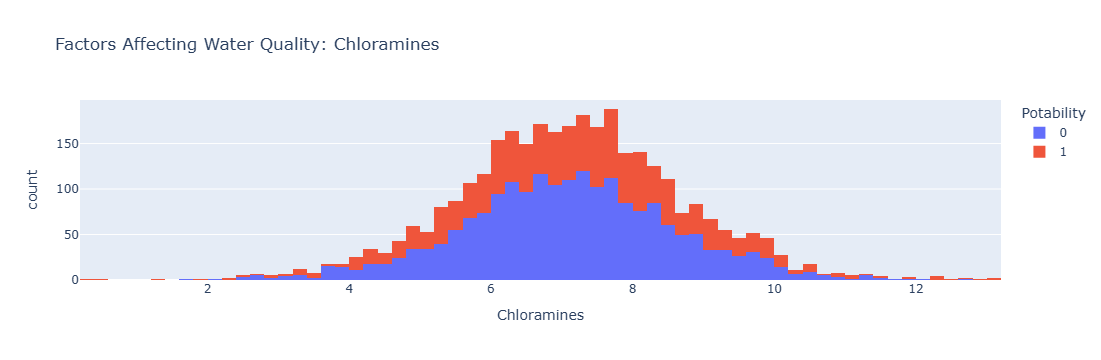

In [61]:
figure = px.histogram(data, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

Cloramin và clo là chất khử trùng được sử dụng trong hệ thống nước công cộng.

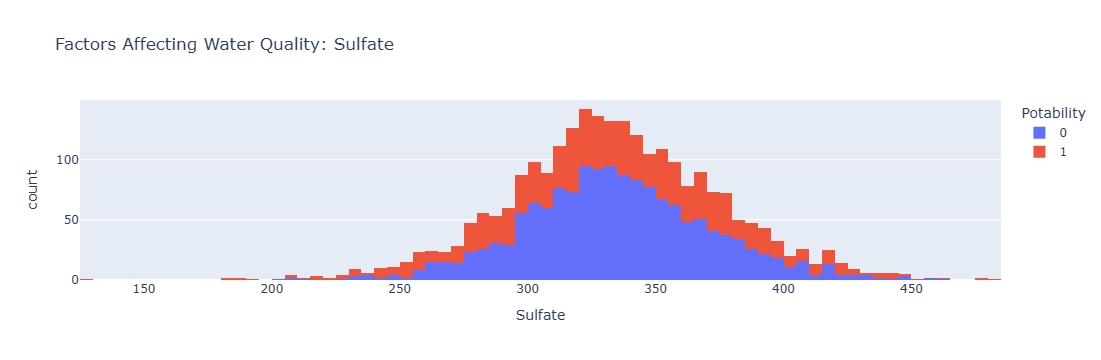

In [63]:
figure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

Sunfat là chất có sẵn trong khoáng chất, đất và đá. Nước chứa ít hơn 500 miligam sunfat là an toàn để uống.

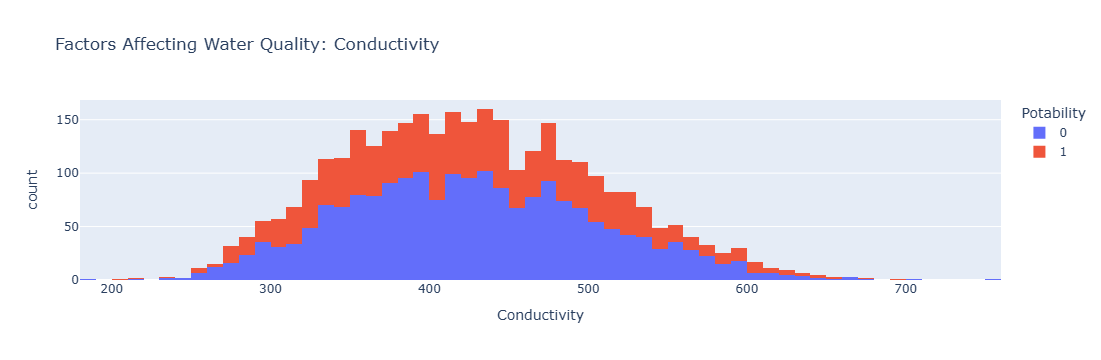

In [65]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

Nước là chất dẫn điện tốt, nhưng dạng nước tinh khiết nhất không phải là chất dẫn điện tốt. Nước có độ dẫn điện dưới 500 có thể uống được.

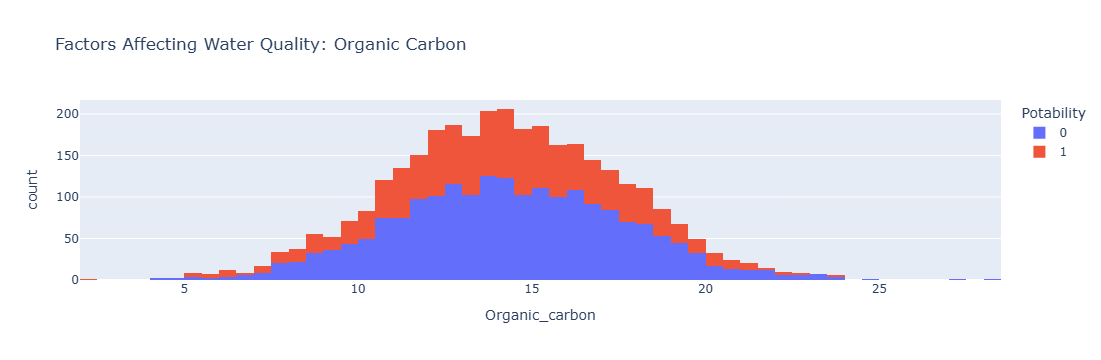

In [67]:
figure = px.histogram(data, x = "Organic_carbon", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

Cacbon hữu cơ có nguồn gốc từ sự phân hủy các vật liệu hữu cơ tự nhiên và các nguồn tổng hợp. Nước chứa ít hơn 25 miligam cacbon hữu cơ được coi là an toàn để uống.

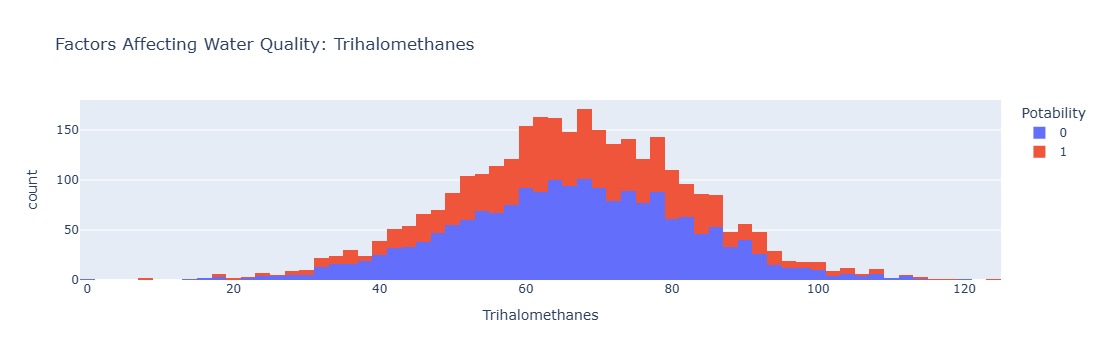

In [69]:
figure = px.histogram(data, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

THMs là hóa chất có trong nước đã xử lý bằng clo. Nước chứa ít hơn 80 miligam THMs được coi là an toàn để uống.

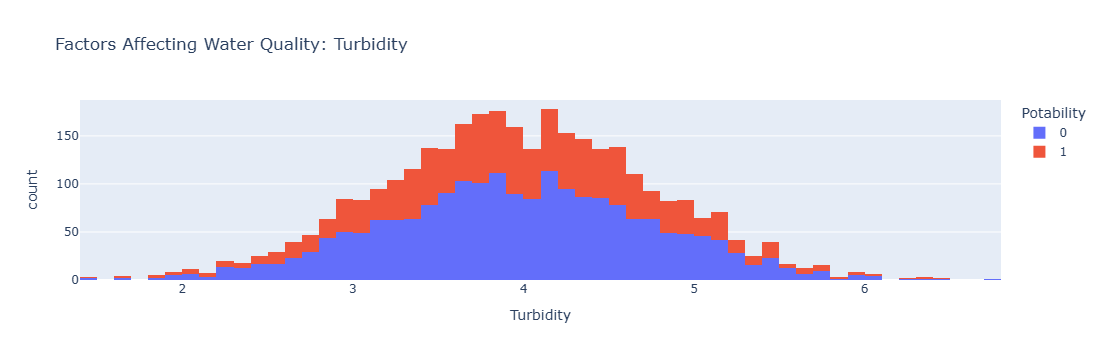

In [71]:
figure = px.histogram(data, x = "Turbidity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

Độ đục của nước phụ thuộc vào số lượng chất rắn có trong huyền phù. Nước có độ đục dưới 5 miligam được coi là có thể uống được.

In [73]:
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [74]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [75]:
X = data.drop('Potability', axis=1)
y = data['Potability']
X.shape, y.shape

((3276, 9), (3276,))

In [84]:
# import StandardScaler để thực hiện việc chia tỷ lệ
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Using Random Forest Classifier

In [92]:
import time
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dữ liệu
data = pd.read_csv(r"D:\dataset\water_potability.csv")
data = data.dropna()  # Xử lý dữ liệu thiếu

# Chia X và y
X = data.drop(columns=['Potability'])
y = data['Potability']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Khởi tạo mô hình
model = RandomForestClassifier(random_state=42)

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
rmse_scores = []
train_times = []  # Thời gian train
test_times = []  # Thời gian test

# Chạy 10 lần với 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
    print(f"Fold {fold}:")

    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Bắt đầu đo thời gian train
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    # Bắt đầu đo thời gian test
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()

    # Tính Accuracy và RMSE
    accuracy = np.mean(y_pred == y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    accuracy_scores.append(accuracy)
    rmse_scores.append(rmse)
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

    print(f"  Thời gian train: {end_train - start_train:.4f} giây")
    print(f"  Thời gian test: {end_test - start_test:.4f} giây")
    print(f"  Accuracy: {accuracy:.4f}, RMSE: {rmse:.4f}\n")

# Tạo bảng kết quả
results_df = pd.DataFrame({
    "Lần chạy": range(1, 11),
    "Accuracy": accuracy_scores,
    "RMSE": rmse_scores,
    "Thời gian train (s)": train_times,
    "Thời gian test (s)": test_times
})


Fold 1:
  Thời gian train: 0.4851 giây
  Thời gian test: 0.0041 giây
  Accuracy: 0.6832, RMSE: 0.5629

Fold 2:
  Thời gian train: 0.5014 giây
  Thời gian test: 0.0040 giây
  Accuracy: 0.6667, RMSE: 0.5774

Fold 3:
  Thời gian train: 0.4926 giây
  Thời gian test: 0.0042 giây
  Accuracy: 0.7214, RMSE: 0.5278

Fold 4:
  Thời gian train: 0.4738 giây
  Thời gian test: 0.0015 giây
  Accuracy: 0.6816, RMSE: 0.5643

Fold 5:
  Thời gian train: 0.4719 giây
  Thời gian test: 0.0000 giây
  Accuracy: 0.6816, RMSE: 0.5643

Fold 6:
  Thời gian train: 0.4951 giây
  Thời gian test: 0.0040 giây
  Accuracy: 0.7214, RMSE: 0.5278

Fold 7:
  Thời gian train: 0.4702 giây
  Thời gian test: 0.0040 giây
  Accuracy: 0.6567, RMSE: 0.5859

Fold 8:
  Thời gian train: 0.4872 giây
  Thời gian test: 0.0034 giây
  Accuracy: 0.6368, RMSE: 0.6026

Fold 9:
  Thời gian train: 0.4744 giây
  Thời gian test: 0.0080 giây
  Accuracy: 0.7164, RMSE: 0.5325

Fold 10:
  Thời gian train: 0.4768 giây
  Thời gian test: 0.0037 giây
  A

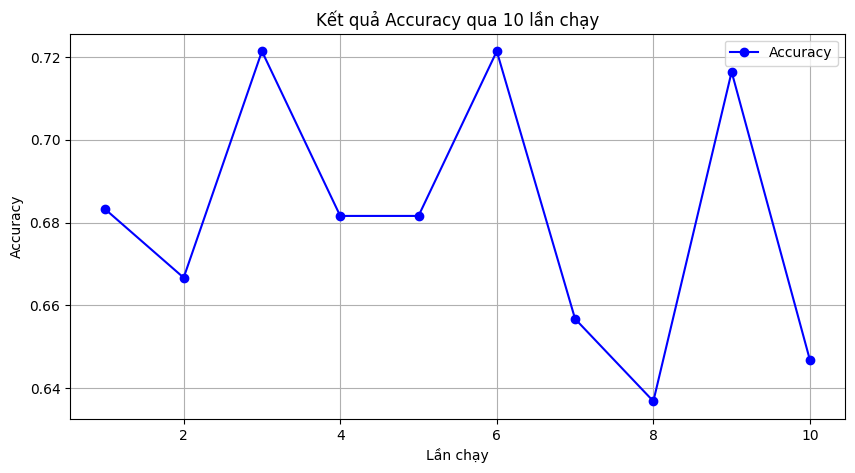

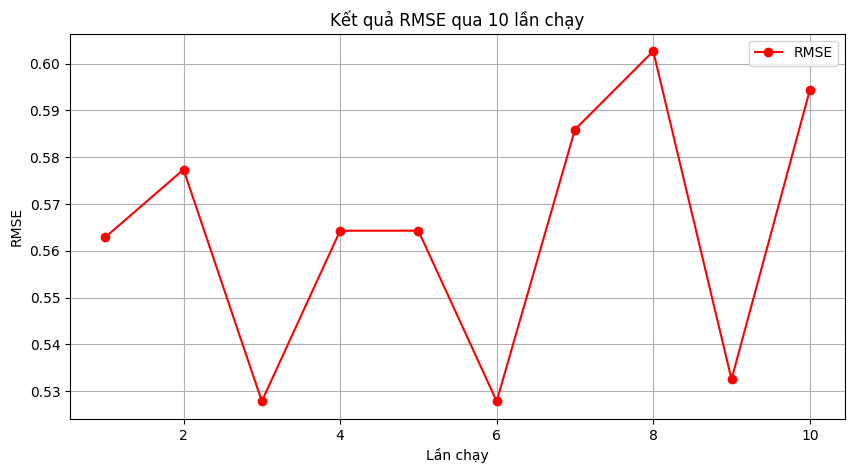

In [104]:
# Vẽ biểu đồ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(results_df["Lần chạy"], results_df["Accuracy"], marker='o', linestyle='-', color='b', label='Accuracy')
plt.title("Kết quả Accuracy qua 10 lần chạy")
plt.xlabel("Lần chạy")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ RMSE
plt.figure(figsize=(10, 5))
plt.plot(results_df["Lần chạy"], results_df["RMSE"], marker='o', linestyle='-', color='r', label='RMSE')
plt.title("Kết quả RMSE qua 10 lần chạy")
plt.xlabel("Lần chạy")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

In [106]:
# Hiển thị bảng kết quả
results_df = results_df.reset_index(drop=True)
print("Bảng tổng hợp kết quả từ 10 lần chạy:")
print(results_df.to_string(index=False))

# Kết quả trung bình
mean_accuracy = np.mean(accuracy_scores)
mean_rmse = np.mean(rmse_scores)
mean_train_time = np.mean(train_times)
mean_test_time = np.mean(test_times)

print(f"\nĐộ chính xác trung bình: {mean_accuracy:.2f}")
print(f"RMSE trung bình: {mean_rmse:.2f}")
print(f"Thời gian train trung bình: {mean_train_time:.4f} giây")
print(f"Thời gian test trung bình: {mean_test_time:.4f} giây")

Bảng tổng hợp kết quả từ 10 lần chạy:
 Lần chạy  Accuracy     RMSE  Thời gian train (s)  Thời gian test (s)
        1  0.683168 0.562878             0.485108            0.004092
        2  0.666667 0.577350             0.501444            0.003990
        3  0.721393 0.527832             0.492601            0.004220
        4  0.681592 0.564276             0.473754            0.001470
        5  0.681592 0.564276             0.471902            0.000000
        6  0.721393 0.527832             0.495087            0.004014
        7  0.656716 0.585904             0.470178            0.004005
        8  0.636816 0.602648             0.487243            0.003396
        9  0.716418 0.532524             0.474422            0.008000
       10  0.646766 0.594335             0.476808            0.003741

Độ chính xác trung bình: 0.68
RMSE trung bình: 0.56
Thời gian train trung bình: 0.4829 giây
Thời gian test trung bình: 0.0037 giây
